# SIR epidemic model

### S(t): Susceptibles
### I(t): Infectados
### R(t): Recuperados

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [20]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 1./20 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [21]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

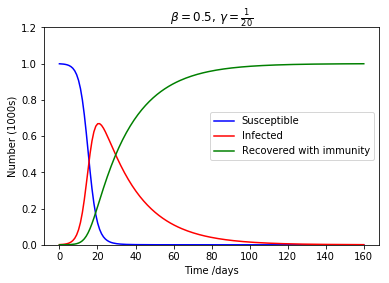

In [31]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t, S/1000, 'b', label='Susceptible')
plt.plot(t, I/1000, 'r', label='Infected')
plt.plot(t, R/1000, 'g', label='Recovered with immunity')
plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
plt.ylim(0,1.2)
plt.title('$\\beta=0.5$, $\\gamma=\\frac{1}{20}$')
#plt.title('W1 disk and central $\\beta$ subtracted', fontsize = 'small')
plt.legend()
plt.show()

In [80]:
def plotsir(beta,days):
     # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    gamma = 1./days
    
    # Total population, N.
    N = 1000
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, R0 = 1, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # A grid of time points (in days)
    t = np.linspace(0, 160, 160)

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.plot(t, S/1000, 'b', label='Susceptible')
    plt.plot(t, I/1000, 'r', label='Infected')
    plt.plot(t, R/1000, 'g', label='Recovered with immunity')
    plt.xlabel('Time /days')
    plt.ylabel('Number (1000s)')
    plt.ylim(0,1.2)
    plt.title('$\\beta=$ %1.3f' %beta)
    #plt.title('$\\beta=$ %1.3f' %beta, '$\\gamma=$  %1.3f' %gamma )
    #plt.title('W1 disk and central $\\beta$ subtracted', fontsize = 'small')
    #plt.title('x= '+str(x)+', y = '+str(y))    
    plt.title('$\\beta=$' +str(beta) + '  days=' + str(days))    
    plt.legend()
    plt.show()

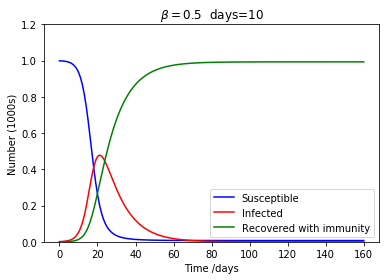

In [81]:
plotsir(0.5,10)

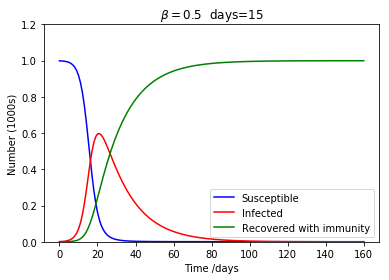

In [86]:
plotsir(0.5,15)

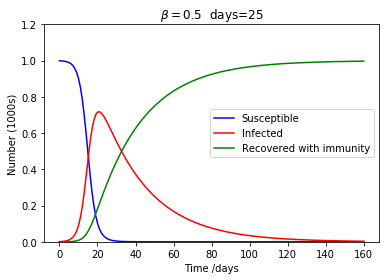

In [87]:
plotsir(0.5,25)

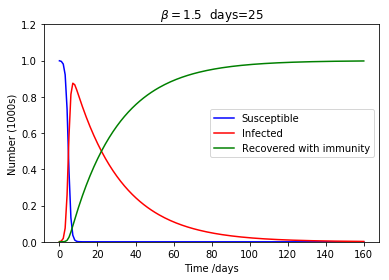

In [88]:
plotsir(1.5,25)

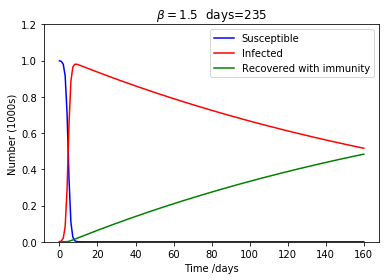

In [89]:
plotsir(1.5,235)